In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing the dataset
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [3]:
# printing the first 5 rows 
print(df.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [4]:
# getting the shape of dataset
print(df.shape)

(9994, 11)


In [5]:
# getting the information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
None


In [6]:
# checking null and missing values in dataset
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [7]:
# Converting 'Order Date' to datetime format and dropping unnecessary columns for analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

In [8]:
# dropping the unneccessary columns from dataset
df.drop(['Order ID', 'Customer Name', 'State'], axis=1, inplace=True)

In [9]:
df.head()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28
1,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80
2,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60
4,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45


##### Outlier Removal

In [11]:
# Removing outliers in 'Profit', 'Discount', and 'Sales' columns based on known thresholds

df = df[df['Profit'] != 2000]  
df = df[df['Discount'] != 200]
df = df[df['Sales'] != 1000]

##### Visualizing Outliers

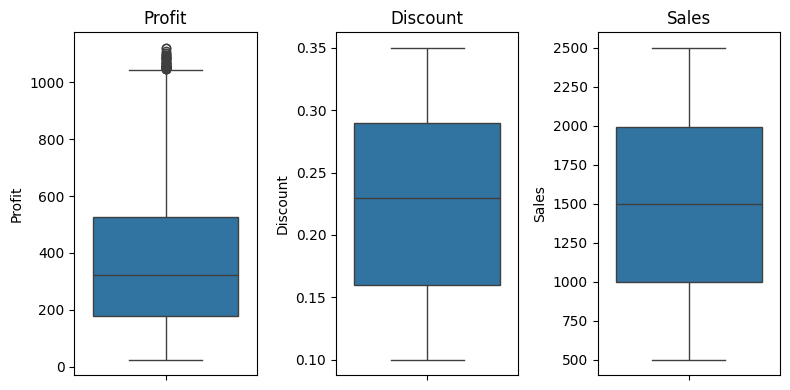

In [13]:
# Using boxplots to visualize potential outliers in 'Profit', 'Discount', and 'Sales'

plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
sns.boxplot(df['Profit']).set_title('Profit')
plt.subplot(1, 3, 2)
sns.boxplot(df['Discount']).set_title('Discount')
plt.subplot(1, 3, 3)
sns.boxplot(df['Sales']).set_title('Sales')
plt.tight_layout()
plt.show()

##### Normalizing Numerical Features

In [15]:
# Applying MinMaxScaler to 'Sales', 'Discount', and 'Profit' columns to bring values within a range of [0, 1]

scaler = MinMaxScaler()
df[['Sales', 'Discount', 'Profit']] = scaler.fit_transform(df[['Sales', 'Discount', 'Profit']])
df.head()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Oil & Masala,Masalas,Vellore,2017-08-11,North,0.3770,0.08,0.343187
1,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,0.1245,0.32,0.113672
2,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,0.9300,0.44,0.127727
3,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,0.1980,0.60,0.058730
4,Food Grains,Organic Staples,Ooty,2016-11-10,South,0.9275,0.64,0.815187


##### One-Hot Encoding for Categorical Features

In [17]:
# Using pd.get_dummies to encode categorical variables into binary columns

df = pd.get_dummies(df, columns=['Category', 'Sub Category', 'City', 'Region'], drop_first=True)
df.head()

,Order Date,Sales,Discount,Profit,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,Category_Oil & Masala,Category_Snacks,...,City_Theni,City_Tirunelveli,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West
0,2017-08-11,0.3770,0.08,0.343187,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,2017-08-11,0.1245,0.32,0.113672,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-12-06,0.9300,0.44,0.127727,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2016-11-10,0.1980,0.60,0.058730,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2016-11-10,0.9275,0.64,0.815187,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


##### Feature Engineering

In [19]:
# Extracting 'Order Year', 'Order Month', and 'Order Day of Week' from the 'Order Date' column
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.dayofweek
df.head()

,Order Date,Sales,Discount,Profit,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,Category_Oil & Masala,Category_Snacks,...,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West,Order Year,Order Month,Order Day of Week
0,2017-08-11,0.3770,0.08,0.343187,False,False,False,False,True,False,...,True,False,False,False,True,False,False,2017,8,4
1,2017-08-11,0.1245,0.32,0.113672,True,False,False,False,False,False,...,False,False,False,False,False,True,False,2017,8,4
2,2017-12-06,0.9300,0.44,0.127727,False,False,True,False,False,False,...,False,False,False,False,False,False,True,2017,12,2
3,2016-11-10,0.1980,0.60,0.058730,False,False,False,True,False,False,...,False,False,False,False,False,True,False,2016,11,3
4,2016-11-10,0.9275,0.64,0.815187,False,False,True,False,False,False,...,False,False,False,False,False,True,False,2016,11,3


##### Analyzing Sales by Category

In [21]:
# Summing sales for each category to identify high-selling product categories
category_columns = [col for col in df.columns if col.startswith('Category_')]
sales_by_category = df[category_columns].multiply(df['Sales'], axis=0).sum().reset_index()
sales_by_category.columns = ['Category', 'Total Sales']
df.head()

,Order Date,Sales,Discount,Profit,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,Category_Oil & Masala,Category_Snacks,...,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West,Order Year,Order Month,Order Day of Week
0,2017-08-11,0.3770,0.08,0.343187,False,False,False,False,True,False,...,True,False,False,False,True,False,False,2017,8,4
1,2017-08-11,0.1245,0.32,0.113672,True,False,False,False,False,False,...,False,False,False,False,False,True,False,2017,8,4
2,2017-12-06,0.9300,0.44,0.127727,False,False,True,False,False,False,...,False,False,False,False,False,False,True,2017,12,2
3,2016-11-10,0.1980,0.60,0.058730,False,False,False,True,False,False,...,False,False,False,False,False,True,False,2016,11,3
4,2016-11-10,0.9275,0.64,0.815187,False,False,True,False,False,False,...,False,False,False,False,False,True,False,2016,11,3


##### Visualizing Sales by Category

C:\Users\Sushant\AppData\Local\Temp\ipykernel_20780\1633500577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Sales', y='Category', data=sales_by_category, palette='viridis')


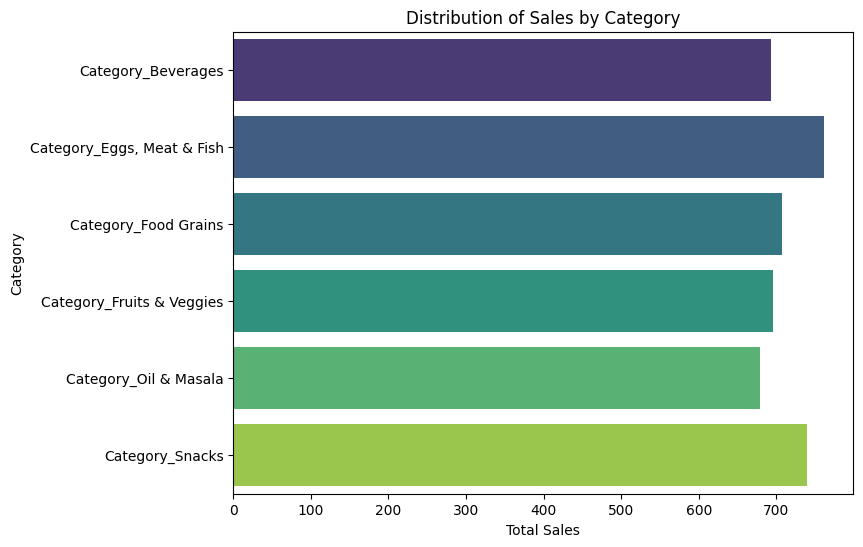

In [23]:
# Creating a bar plot to showcase the distribution of total sales by each product category
plt.figure(figsize=(8, 6))
sns.barplot(x='Total Sales', y='Category', data=sales_by_category, palette='viridis')
plt.title('Distribution of Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

##### Sales Trends Over Time

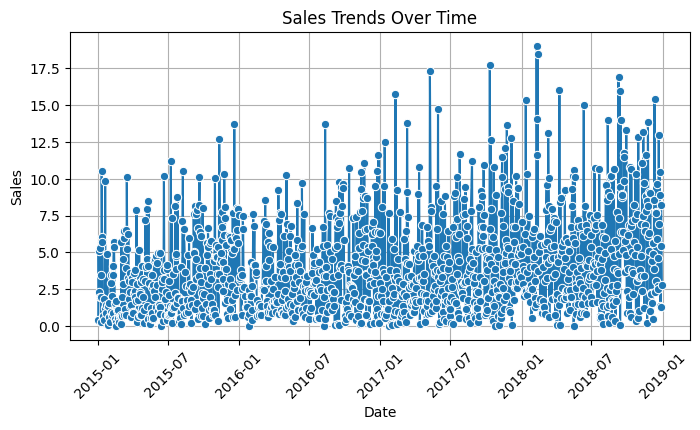

In [25]:
# Grouping data by 'Order Date' and plotting sales trends to observe seasonality or overall trends
df_time = df.groupby('Order Date').sum()['Sales'].reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_time, x='Order Date', y='Sales', marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### Correlation Analysis

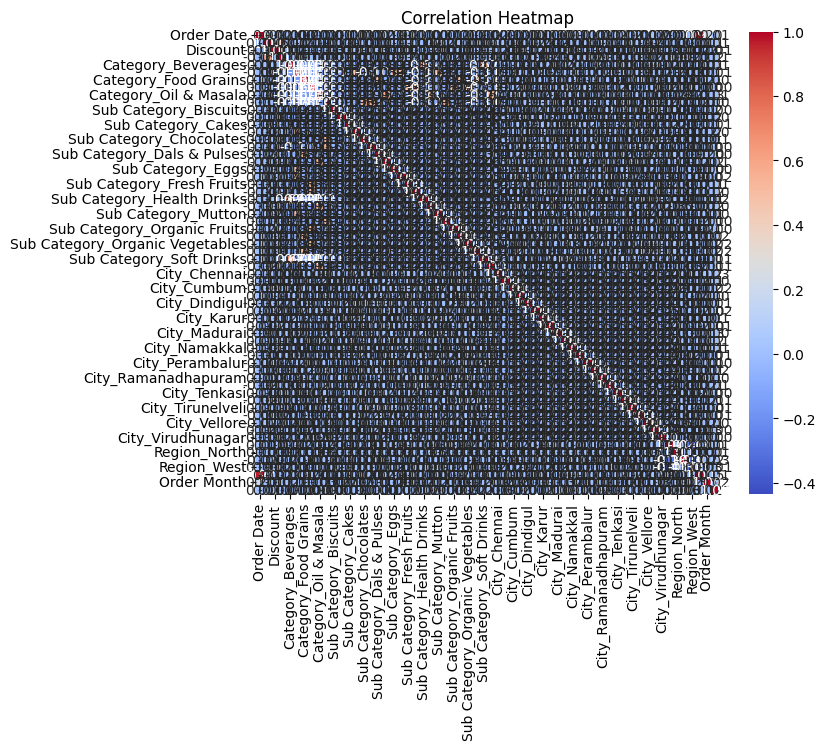

In [27]:
# Using a heatmap to visualize the correlation between numerical features
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

##### Linear Regression Model

In [29]:
# Defining features and target variable for predicting 'Profit'
X = df.drop(['Profit', 'Order Date'], axis=1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Normalizing features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [31]:
# Training the Linear Regression Model
model = LinearRegression()
model.fit(X_train_normalized, y_train)


LinearRegression()

In [32]:
# Model Evaluation
y_pred = model.predict(X_test_normalized)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.646451578979207e+20
R-squared: -1.4107147084503965e+22


##### Random Forest Classifier for Category Prediction

In [34]:
# Using RandomForestClassifier to classify whether a sale belongs to the 'Category_Beverages'
df['Category_Beverages'] = df['Category_Beverages'].astype(int)
y = df['Category_Beverages']
X = df.drop(category_columns + ['Sales', 'Order Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Training the Model and Evaluating Accuracy
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00       298

    accuracy                           1.00      1998
   macro avg       1.00      1.00      1.00      1998
weighted avg       1.00      1.00      1.00      1998

Confusion Matrix:
 [[1700    0]
 [   0  298]]


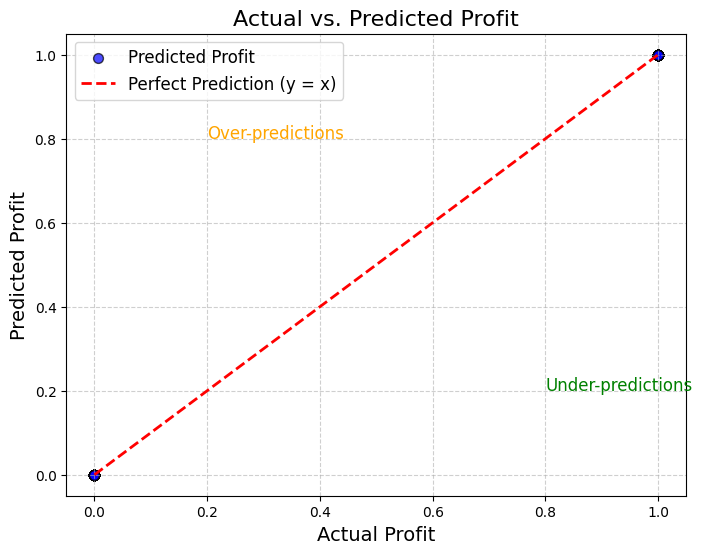

In [36]:
# Visualizing Actual vs. Predicted Profit
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Scatter plot for actual vs. predicted profits
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k', s=50, label='Predicted Profit')

# Line of equality (y = x) for visual reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction (y = x)')

# Add plot labels and title
plt.xlabel('Actual Profit', fontsize=14)
plt.ylabel('Predicted Profit', fontsize=14)
plt.title('Actual vs. Predicted Profit', fontsize=16)

# Add annotations to improve plot readability
plt.annotate('Under-predictions', xy=(y_test.max()*0.8, y_test.max()*0.2), color='green', fontsize=12)
plt.annotate('Over-predictions', xy=(y_test.max()*0.2, y_test.max()*0.8), color='orange', fontsize=12)

# Add grid lines for easier visual comparison
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend for clarity
plt.legend(fontsize=12)

# Show the plot
plt.show()


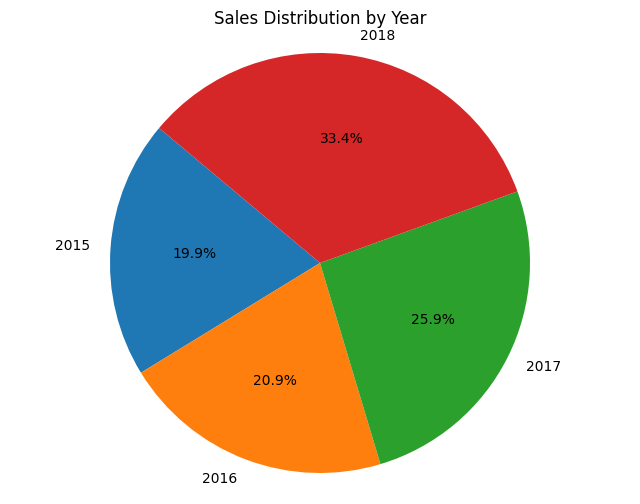

In [37]:
# Sales Distribution by Year
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(yearly_sales['Sales'], labels=yearly_sales['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Year')
plt.axis('equal')
plt.show()

##### Conclusion - 
This analysis of the Supermart Grocery Sales analysis involved multiple stages, including data cleaning, visualization, feature engineering, and machine learning modeling to uncover insights into sales trends, understand relationships between features, and predict profits.